In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
# function for multilevel thresholding
def replace(img,lb,ub):
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            if img[i][j] < ub and img[i][j] > lb:
                img[i][j] = lb
    return img

def thresholding(img,thresholds):
    #iterate over every threshold pair (lower bound, upper bound) 
    for i in range(0,len(thresholds)-1):
        img = replace(img,thresholds[i],thresholds[i+1])
    return img

In [3]:
def print_arr(img):
    for i in range(0,img.shape[0]):
        print(img[i],end=' ')

In [4]:
# load image
# img = cv.imread('lena_colour.png')
img = cv.imread('ball.jpg')

# converting image to grayscale
img_gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)

# apply non-local means filter
nlm_img = cv.fastNlMeansDenoising(img_gray)

# gray image and filtered gray image
# plt.subplot(121),plt.imshow(img_gray, cmap='gray')
# plt.subplot(122),plt.imshow(nlm_img, cmap='gray')

# thresholds recieved from program [8 for gray img, 8 for nlm image]
# PUT YOUR PROGRAM VALUES HERE 'GBEST SCORE'
# x = [19,41,55,90,109,145,173,0,74,86,147,217,226,253]
x =  [75, 162]#[ 11 , 56]

# thresh_img = thresholding(np.copy(img_gray),x[7:15])
thresh_img = np.digitize(nlm_img, bins=x)#thresholding(np.copy(img_gray),x)

# thresh_img = thresholding(img_gray,[0,100,200])

## GSA

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0c93e01910>,
 <matplotlib.image.AxesImage at 0x7f0c935a4e90>)

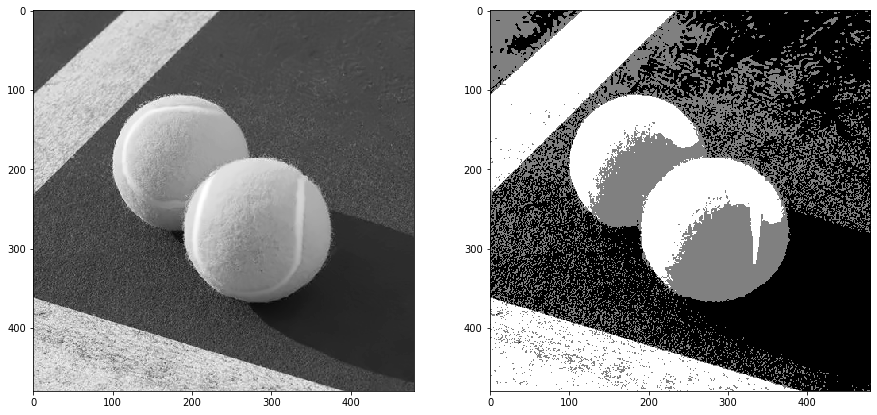

In [5]:
plt.figure(figsize=(15,15))
# plt.subplot(121),plt.imshow(img_gray,cmap='hsv')
# plt.subplot(122),plt.imshow(thresh_img,cmap='hsv')

plt.subplot(121),plt.imshow(nlm_img,cmap='gray')
plt.subplot(122),plt.imshow(thresh_img,cmap='gray')

## Otsu

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0c93521850>,
 <matplotlib.image.AxesImage at 0x7f0c934a4fd0>)

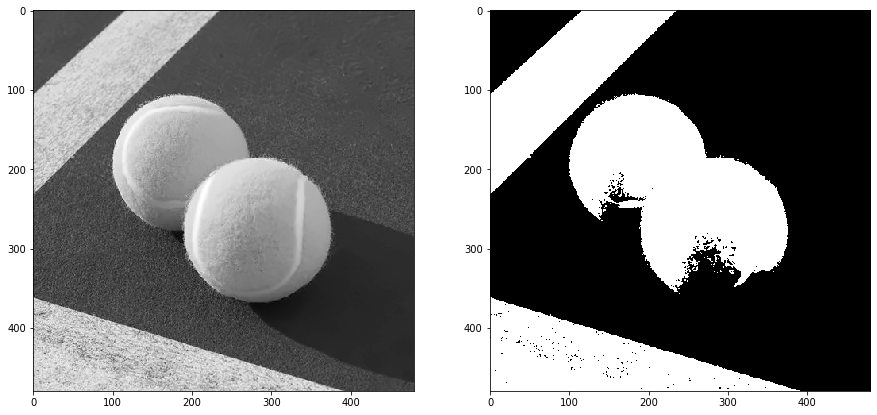

In [6]:
# OTSU
x,otsu_img = cv.threshold(nlm_img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(nlm_img,cmap='gray')
plt.subplot(122),plt.imshow(otsu_img,cmap='gray')

## Otsu vs GSA

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0c91244350>,
 <matplotlib.image.AxesImage at 0x7f0c9122a610>)

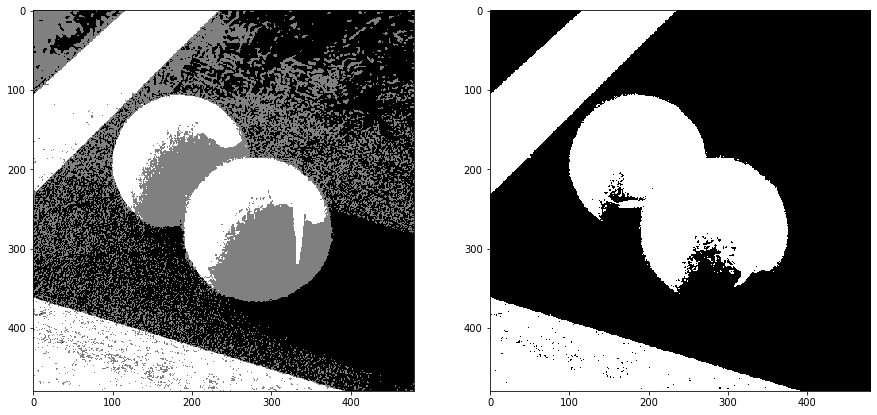

In [7]:
#compare Otsu and GSA 
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(thresh_img,cmap='gray')
plt.subplot(122),plt.imshow(otsu_img,cmap='gray')

In [8]:
from skimage.filters import threshold_multiotsu

In [9]:
thresholds = threshold_multiotsu(nlm_img, classes= 3)

In [10]:
regions = np.digitize(nlm_img, bins=thresholds)

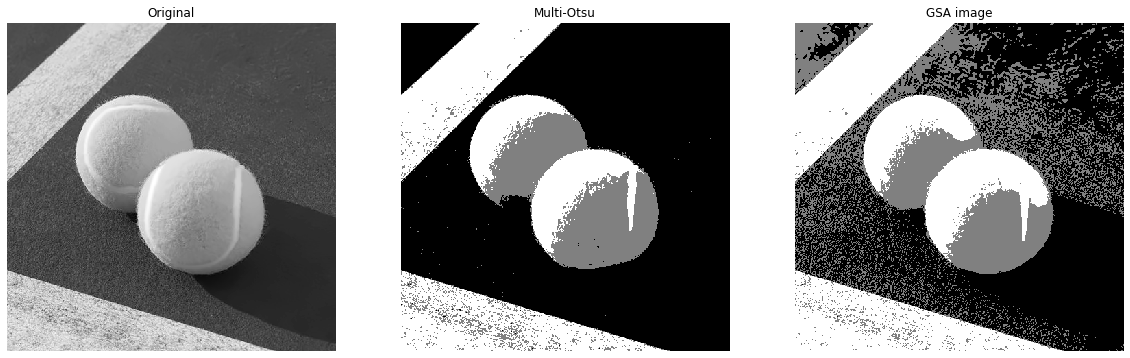

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))

ax[0].imshow(nlm_img,cmap ="gray")
ax[0].set_title("Original")
ax[0].axis("off")

    
ax[1].imshow(regions, cmap="gray")
ax[1].set_title("Multi-Otsu")
ax[1].axis("off")

ax[2].imshow(thresh_img, cmap="gray")
ax[2].set_title("GSA image")
ax[2].axis("off")

plt.subplots_adjust()

In [12]:
from skimage.measure import compare_ssim, compare_nrmse

(score, diff) = compare_ssim(img_gray, regions, full=True)
print("SSIM score for Otsu's algorithm: {}".format(score))


SSIM score for Otsu's algorithm: 0.0038236739135889273


/home/saurabh/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/saurabh/anaconda3/envs/my_env/lib/python3.7/site-packages/skimage/measure/_structural_similarity.py:17: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  **kwargs)


In [13]:
(score, diff) = compare_ssim(img_gray, thresh_img, full=True)
print("SSIM score GSA: {}".format(score))


/home/saurabh/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  """Entry point for launching an IPython kernel.


SSIM score GSA: 0.006751311814171465
